In [1]:
# implementation of logistic regression.
# it is applied when the output to find falls in a discrete no. of classes.( 0 or 1)
# it is basically a classification algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# gonna apply logistic regression to the titanic_dataset to predict the classification - survival or deceased
train = pd.read_csv('data/titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


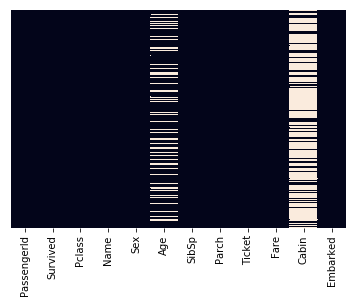

In [7]:
# we can see from the above info that the cabin col has many NaN values and a few in Age col.We can conform it using a heatmap
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

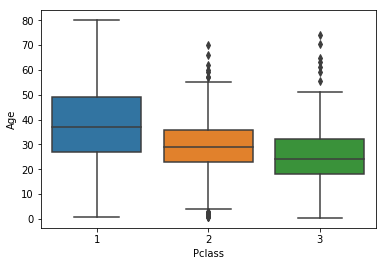

In [8]:
# trying to fill in the Age col 
sns.boxplot(x='Pclass', y='Age', data=train)

In [9]:
# from the above plot we can assume that user in 1st class are from ( 30 - 50 ) a stage of well settled and
# user in 2nd class are from (25 - 35 ) and that in 3rd class are from( 20 - 30)
# we may take an average and conclude that 1st class passenger have an avg age of 40, 2nd class is 30 and third is 26

In [3]:
# function to fill the null entries in age col
def fill_missing_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 40
        elif pclass == 2:
            return 30
        else:
            return 26
    else:
        return age

In [4]:
train['Age'] = train[['Age', 'Pclass']].apply(fill_missing_age, axis=1)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# the next col with null entries is Cabin, there is a lot of null values which makes it difficult to extract info
# from available rows and hence we can drop the col 
train.drop('Cabin', inplace=True, axis=1)

In [6]:
# we can also drop the few null entries that are present in the Embarked col
train.dropna(inplace=True)

In [26]:
# final null cleaned dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [7]:
# Converting categorical features to multiple cols with value 1 or 0 representing the state of the feature
# will help improving algo efficiency

sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

# the option drop_first in the above commands will prevent the algo to predict a feature state on its own if all 
# the other feature's state is given

In [8]:
# droping the categorical col and other not so useful cols
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True, axis=1)

In [9]:
train = pd.concat([train, sex, embarked], axis=1)

In [33]:
# final dataset
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 98.2 KB


In [35]:
# dataset is ready for applying logistic model

In [137]:
# next step is to construct X matrix and y vector for training the model
X_set = train[train.columns.drop('Survived')].values
y_set = train['Survived'].values

In [138]:
# normalization of feature : to adjust the magnitude features to a similar scale

def feature_normalize(X):
    
    # find the mean
    X_mean = np.mean(X, axis=0)
    
    # find the standard deviation
    X_std = np.std(X, axis=0)
    
    # perform regularization
    return ( X - X_mean) / X_std
    

In [139]:
# creating random index to select random samples for the train and test sets
idx = np.random.randint(889, size=889)
idx.shape

(889,)

In [140]:
X_set = feature_normalize(X_set)

In [141]:
# creating the train and test sets to be used for model training and evaluation
X_train_ = X_set[idx[0:600],:]
y_train = y_set[idx[0:600]]
X_test_ = X_set[idx[600:890],:]
y_test = y_set[idx[600:890]]

In [142]:
m,n = X_test_.shape

In [143]:
m

289

In [144]:
n

9

In [145]:
# Compute cost function and gradient

# create a new array with all ones and add the X_ from second col
# it is done to add a col of 1's for the bias term x0

X_train = np.ones((600, n+1))
X_train[:, 1:] = X_train_

X_test = np.ones((289, n+1))
X_test[:, 1:] = X_test_

In [146]:
m_train,n_train = X_train.shape

In [147]:
m_test, n_test = X_test.shape

In [148]:
# initializing the initial theta vector
initial_theta = np.zeros(n_train)

In [149]:
initial_theta.shape

(10,)

In [158]:
# compute the gradient descent to find the min cost function
# theta = theta - ( ( alpha / m) * sum( (hypothesis - y) * X ) )
# the gradient descent algorithm tries to find the optimum value for the parameter
    # vector theta which reduces the cost function 
# the evalation of theta is done by adding or subracting a derivative value( h(theta) - y * X ) along
    # with a learning rate(alpha) and no.of training_set(m) from the theta
    
def gradient_descent(X, y, theta, alpha, num_itr):
    
    m, n = X.shape
    J_history = np.zeros((num_itr, 1))
    
    for i in range(num_itr):
        thetaT = theta
        thetaT(0) = 0 
        x_t = np.dot(X, theta)
        hypothesis = sigmoid(x_t)
        derivative = np.dot( ( hypothesis - y), X)
        theta = theta - ( (alpha / m) * derivative )
        cost = compute_cost(X, y, theta)
    
        J_history[i,0] = cost
    return theta, J_history

In [159]:
# the sigmoid function 
def sigmoid(z):
    
    #g(z) = 1 / 1 + exp(-z)
    g = 1.0 / ( 1 + np.exp(-z))
    return g

In [160]:
# function to compute cost
def compute_cost(X, y, theta):
    # J = (1/m) * sum ( -y * log(hypothesis) - (1-y) * log(1-hypothesis))
    
    m, n = X.shape
    x_t = np.dot(X, theta)
    hypothesis = sigmoid(x_t)
    return ( 1/ m ) * np.sum( -y * np.log(hypothesis) - ( (1-y) * np.log(1-hypothesis)))
    

In [161]:
alpha = 1.0
num_itr = 400

In [163]:
theta, J_history = gradient_descent(X_train, y_train, initial_theta, alpha, num_itr)

array([[0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299],
       [0.41045299]])

In [175]:
predictions = np.dot(X_test, theta)

In [184]:
predictions = sigmoid(predictions)

In [188]:
predictions = np.where(predictions >= 0.5, 1, 0)

In [189]:
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       188
          1       0.72      0.62      0.67       101

avg / total       0.78      0.79      0.78       289



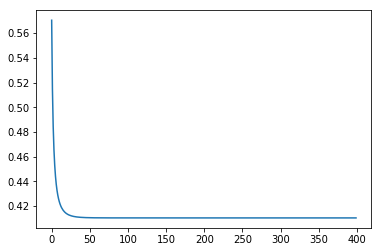

In [178]:
sns.lineplot(np.arange(num_itr), J_history[:,0])

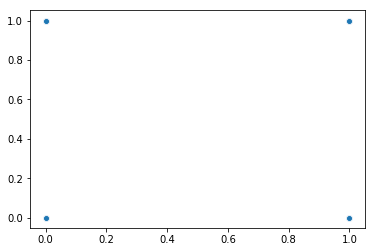

In [191]:
sns.scatterplot(predictions, y_test)